12 steps to Navier-Stokes
=====
***

You see where this is going ... we'll do 2D diffusion now and next we will combine steps 6 and 7 to solve Burgers' equation. So make sure your previous steps work well before continuing.

Step 7: 2D Diffusion
----
***

And here is the 2D-diffusion equation:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

You will recall that we came up with a method for discretizing second order derivatives in Step 3, when investigating 1-D diffusion.  We are going to use the same scheme here, with our forward difference in time and two second-order derivatives. 

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

Once again, we reorganize the discretized equation and solve for $u_{i,j}^{n+1}$

$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)$$

In [171]:
using PyPlot
plt=PyPlot

###variable declarations
nx = 101;
ny = 101;
#nt = 17;
nu=.2;
dx = 2/(nx-1);
dy = 2/(ny-1);
sigma = .25;
dt = sigma*dx*dy/nu;

x = linspace(0,2,nx);
y = linspace(0,2,ny);

u = ones(ny,nx); ##create a 1xn vector of 1's
un = ones(ny,nx); 
dx,dy
0.5/dx, 1/dy

(25.0,50.0)

In [172]:
###Assign initial conditions
s=Int(floor(0.5/dy));
e=Int(floor(1.0/dy));
u[s:e,s:e]=2; ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
#u[Int(.5/dy):Int(1/dy),Int(0.5/dx):Int(1/dx)]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2


2

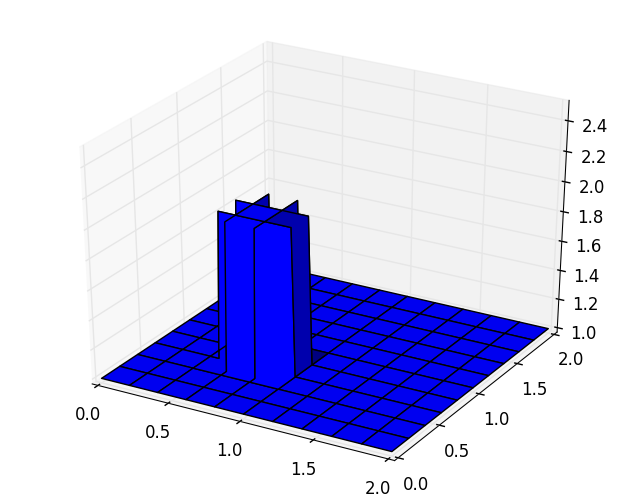

In [173]:
fig1 = figure()
#ax = fig.gca(projection='3d')
#surf = ax.plot_surface(X,Y,u, rstride=1, cstride=1, cmap=cm.coolwarm,
 #       linewidth=0, antialiased=False)
ss = surf(x,y,u)
xlim(0,2)
ylim(0,2)
zlim(1,2.5);

$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)$$

In [174]:
###Run through nt timesteps
function diffuse(nt)
    ###Assign initial conditions
    s=Int(floor(0.5/dy));
    e=Int(floor(1.0/dy));
    u[s:e,s:e]=2; ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    #u[Int(.5/dy):Int(1/dy),Int(0.5/dx):Int(1/dx)]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2

    
    for n in 1:nt 
        un = copy(u) ;
        u[2:end-1,2:end-1]=un[2:end-1,2:end-1]+nu*dt/dx^2*(un[2:end-1,3:end]-2*un[2:end-1,2:end-1]+un[2:end-1,1:end-2])+nu*dt/dy^2*(un[3:end,2:end-1]-2*un[2:end-1,2:end-1]+un[1:end-2,2:end-1])
        u[1,:]=1
        u[end,:]=1
        u[:,1]=1
        u[:,end]=1
    end
    xgrid = repmat(x', nx, 1 )
    ygrid = repmat(y, 1, ny )
    fig1 = figure()
    ax=plt.gca()
    #ss = surf(x,y,u,cmap=ColorMap("coolwarm"))
    plt.plot_surface(xgrid,ygrid,u,cmap=ColorMap("coolwarm"))
    xlim(0,2)
    ylim(0,2)
    zlim(1,2.5);
end
    


diffuse (generic function with 1 method)

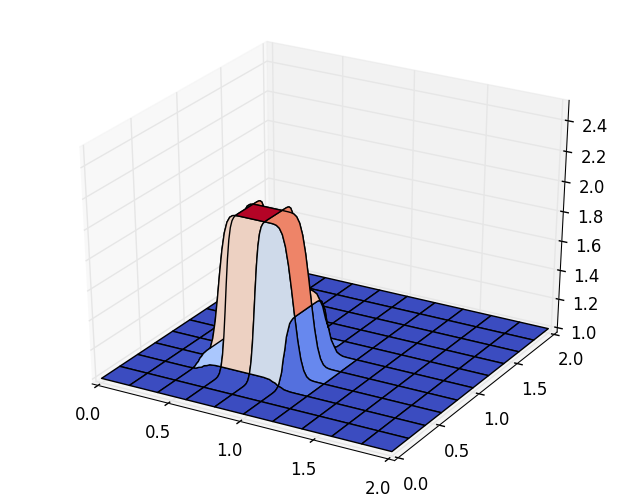

(101,101)

In [175]:
diffuse(10)
size(u)

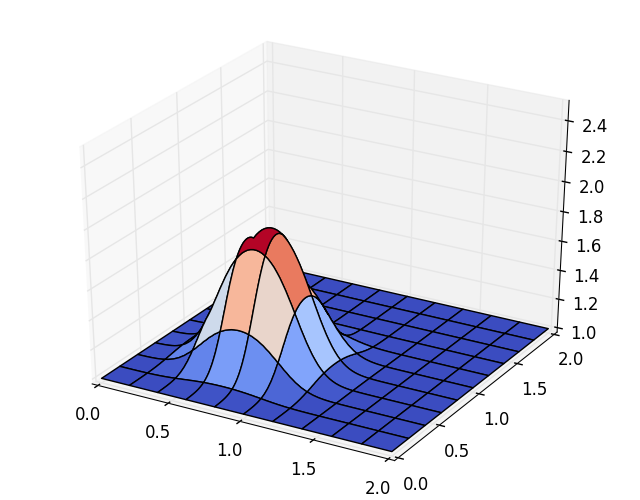

(1,2.5)

In [176]:
diffuse(100)

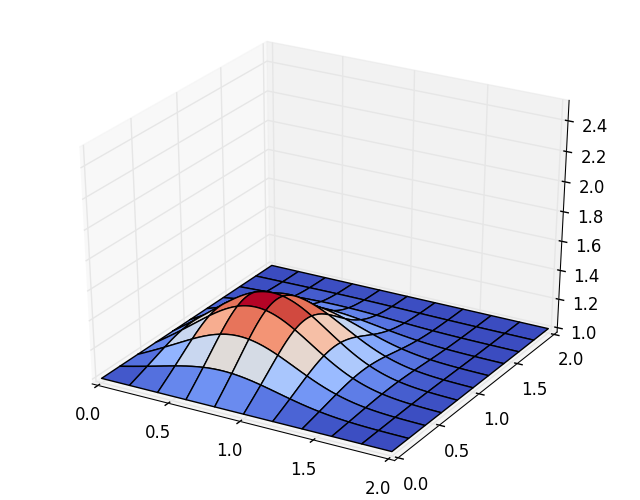

(1,2.5)

In [177]:
diffuse(500)

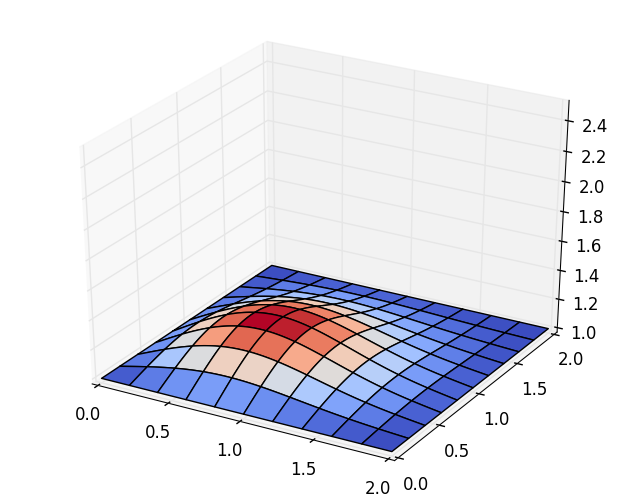

(1,2.5)

In [178]:
diffuse(1000)

### A surface plot example

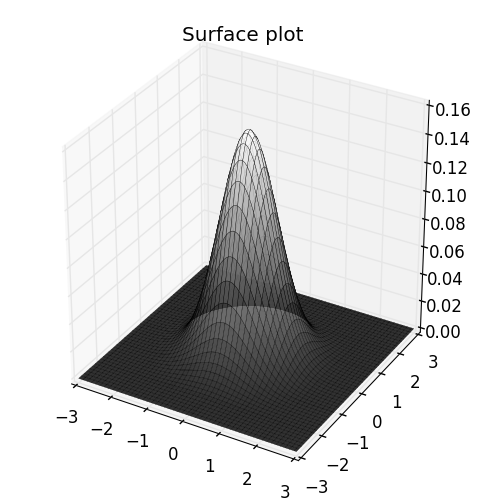

In [179]:
function gauss(x, mu, sigma)
    @assert size(x, 1) == size(mu, 1)  "Dimension mismatch"
    @assert size(x, 1) == size(sigma, 1)  "Dimension mismatch"
    d = size(x, 1)
    return (1 / (sqrt(2pi)^d * det(inv(sigma))^(1/2)) * exp(- (x - mu)' * inv(sigma) * (x - mu) ))[1]
end

mu = [0; 0]
sigma =  eye(2)

n = 100
x = linspace(-3, 3, n)
y = linspace(-3, 3, n)
xgrid = repmat(x', n, 1 )
ygrid = repmat(y, 1, n )
X = [xgrid[:] ygrid[:]]'
z = [gauss(X[:,i], mu, sigma) for i in 1:size(X, 2)]
zgrid = reshape(z, n, n)
plt.figure("Surface plot", figsize=(6,6))
plt.plot_surface(xgrid, ygrid, zgrid,
                rstride=2,edgecolors="k", 
                cstride=2, cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
plt.title("Surface plot");